In [2]:
# Import libraries
import pandas as pd  # Data analysis and data cleaning
import numpy as np   # Numerical operations and array manipulation
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Data visualization
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Feature scaling by removing the mean and scaling to unit variance
from sklearn import svm  # Support Vector Machine algorithms
from sklearn.metrics import accuracy_score  # To compute the accuracy of the model
from sklearn.linear_model import LogisticRegression  # Logistic Regression algorithm
from sklearn.ensemble import RandomForestClassifier  # Algorithm that uses an ensemble of decision trees to classify data
from sklearn.metrics import confusion_matrix, classification_report  # To evaluate the model's performance

In [3]:
# Load the dataset without specifying column names
data= pd.read_csv('diabetes.csv')
print(data)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
data.head(10)  #to check first 10 entires use head funtion with the number 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.tail(5)  #to check last 5 entires use head funtion with the number

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.shape  #to check the total number of rows and columns use shape func

(768, 9)

In [8]:
data.isnull()   #false indicate no missing values 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [10]:
data.dtypes   #to check the type of the columns 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
data.isnull().sum()  #checking null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.duplicated().sum()

np.int64(0)

There are no NULL AND DUPLICATE values in the dataset


In [15]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0: 500 occurrences (indicating no diabetes) 1: 268 occurrences (indicating diabetes) This suggests that the dataset is imbalanced, with more instances of non-diabetic cases compared to diabetic cases.

In [16]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


DATA VISUALIZATION

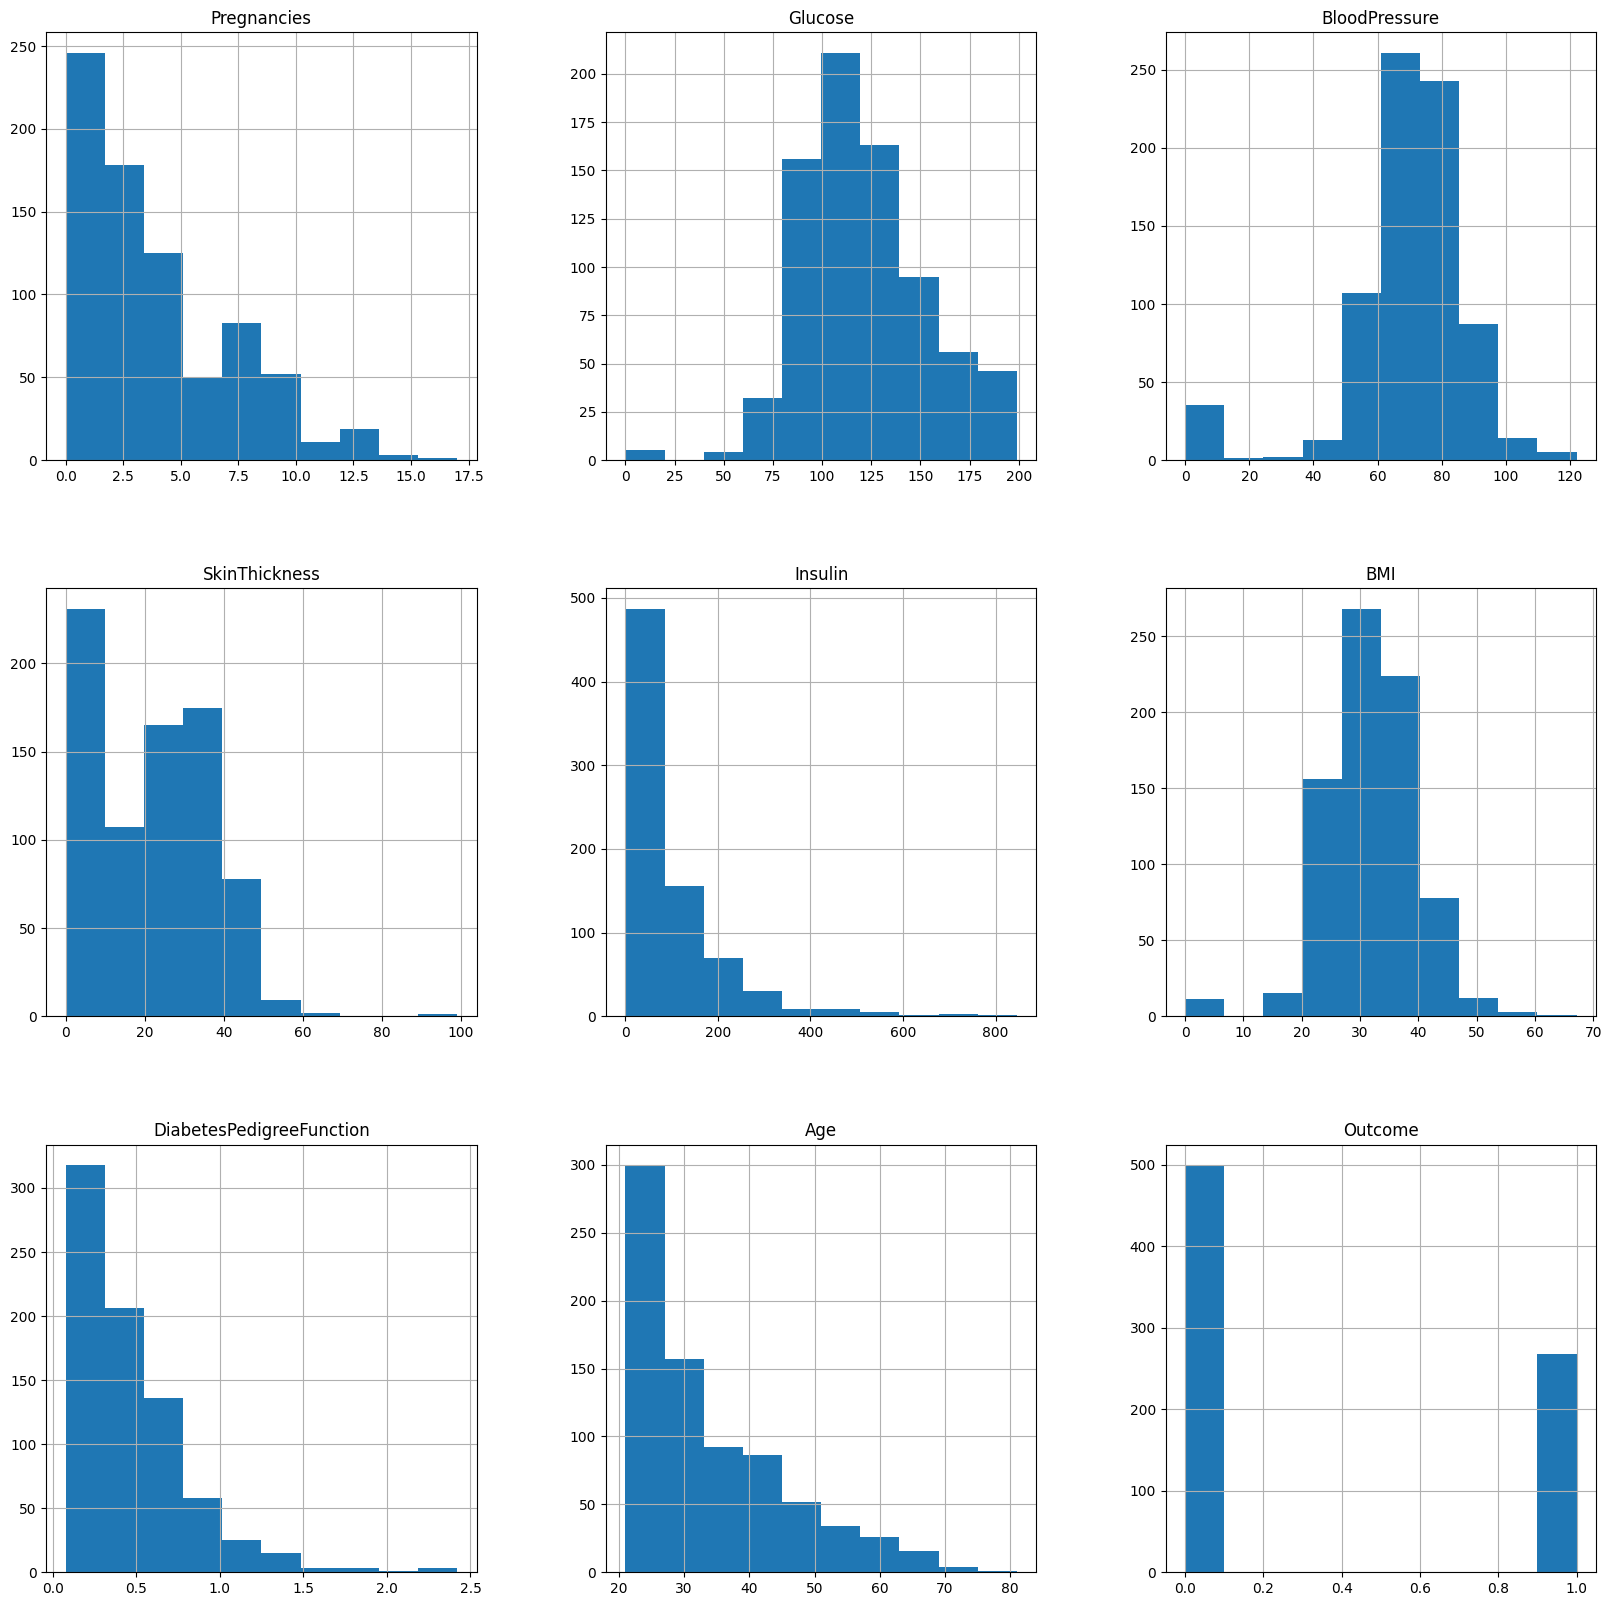

In [17]:
#plotting the data distribution plots
p = data.hist(figsize = (20,20))

#histogram is a representation of the distribution of data


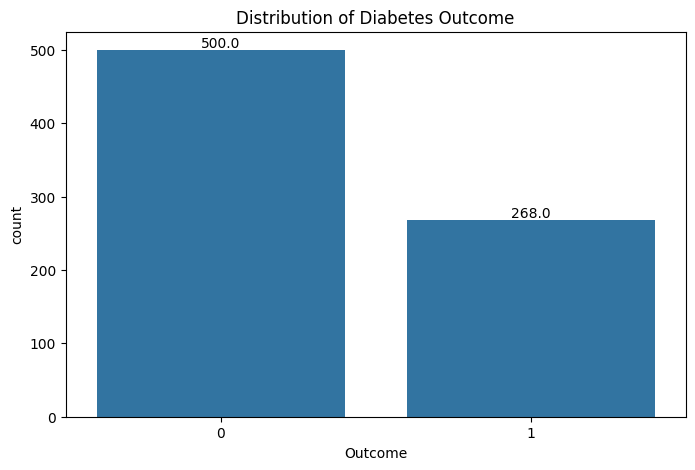

In [18]:
# Check the distribution of the target variable (Outcome)
import seaborn as sns  
import matplotlib.pyplot as plt   
plt.figure(figsize=(8, 5)); ax = sns.countplot(x='Outcome', data=data);
[ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom') for p in ax.patches]; 
plt.title('Distribution of Diabetes Outcome'); 
plt.show()

The chart illustrates an imbalance in the dataset, with significantly more individuals classified as not having diabetes compared to those who do.

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients.

Observing Outliers

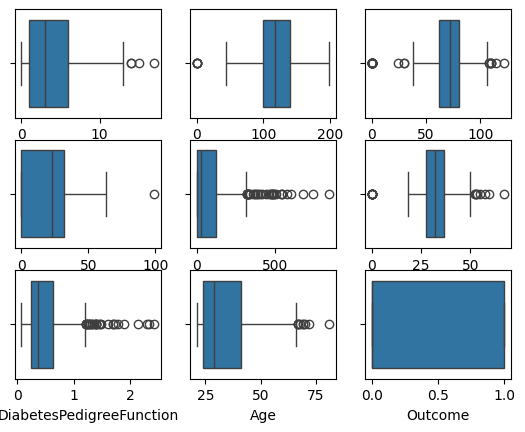

In [19]:
plt.figure(figure=(15,15))
for i,col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = data)
plt.show()

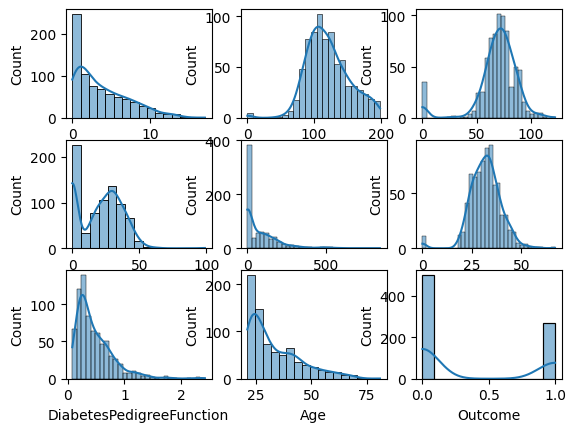

In [21]:
plt.figure(figure=(10,10))
for i,col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = data , kde = True)
plt.show()

Text(0, 0.5, 'Glucose Level')

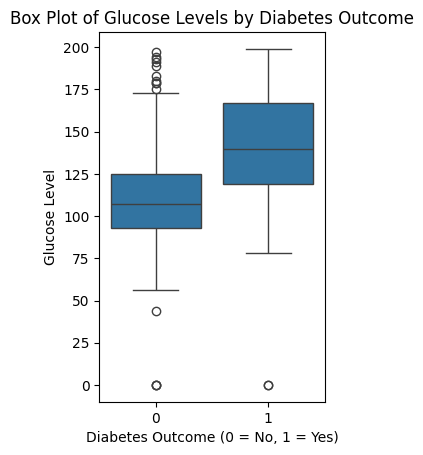

In [23]:
# Box plot  
plt.subplot(1, 2, 2)  
sns.boxplot(x='Outcome', y='Glucose', data=data)  
plt.title('Box Plot of Glucose Levels by Diabetes Outcome')  
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')  
plt.ylabel('Glucose Level')  


Split the dataset into training and testing sets.

In [24]:
# Split the dataset into training and testing sets
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
# Ensure the scaler does not expect feature names
scaler.set_output(transform="default")

StandardScaler()

In [27]:
# Train a machine learning model
# Here we use a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Accuracy: 0.7207792207792207


This line creates a new data point that represents the features of a hypothetical patient. The features are:

6: Number of pregnancies

148: Plasma glucose concentration (glucose level)

72: Diastolic blood pressure (blood pressure)

35: Triceps skin fold thickness (skin thickness)

0: 2-Hour serum insulin (insulin level)

33.6: Body mass index (BMI)

0.627: Diabetes pedigree function (a measure of the extent of diabetes in the family)

50: Age

In [38]:
# Predict diabetes for new instances
# Example: Create a new data point
new_data = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]  # This is a made-up example

# Ensure the new data has the same feature names as the training data
new_data = pd.DataFrame(new_data, columns=X.columns)

# Scale the new data
new_data = scaler.transform(new_data)

# Predict diabetes for the new data point
new_prediction = model.predict(new_data)
print("The person has diabetes:" if new_prediction[0] == 1 else "The person does not have diabetes.")

The person has diabetes:
